In [27]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os

result_random_file = "w_test_features=True_label_balance=False_results.p"
result_greedy_file = "w_test_features=False_label_balance=Greedy_noise=0.01_results.p"

files = [result_greedy_file,
        result_random_file
       ]
stats_dict = {}

In [28]:
for file in  files:
    try:
        with open(file, 'rb') as f:
            stats_dict[file] = pk.load(f, encoding='latin1')
    except Exception as e:
        print(e)
        print("No " + tuple_var_file[0])
        
results = stats_dict[files[0]]['results']
results_random = stats_dict[files[1]]['results']


In [29]:
def get_split_data(data,prefix_keys=''):
    data_plot_dict = {}
    for tup in data:
        if prefix_keys + tup[0] in data_plot_dict:
            data_plot_dict[prefix_keys + tup[0]]['x'].append(tup[1])
            data_plot_dict[prefix_keys + tup[0]]['y'].append(tup[2])
            data_plot_dict[prefix_keys + tup[0]]['err'].append(tup[3])
        else:
            data_plot_dict[prefix_keys + tup[0]] = {'x':[tup[1]], 'y':[tup[2]] ,'err':[tup[3]]}
        
    return data_plot_dict

blue_patch = mpatches.Patch(color='blue', label='greedy gcnn')
red_patch = mpatches.Patch(color='red', label='random gcnn')
yellow_patch = mpatches.Patch(color='yellow', label='dense nn')
cyan_patch = mpatches.Patch(color='cyan', label='k-nn')
green_patch = mpatches.Patch(color='green', label='sampled gcnn Idenity')
black_patch = mpatches.Patch(color='black', label='gcnn Identity')

plot_dict_display = {'dense':('y',yellow_patch),
                     'gcn':('b',blue_patch),
                     'random_gcn':('r',red_patch),
                     'I_gcn':('k',black_patch),
                     'I_gcn_subsampled':('g',green_patch),
                     'k-nn':('c',cyan_patch)}


def plot_test(title, save_file,data_plot_dict, line_display_option='o-'):
    handles = []
    for model_to_plot in data_plot_dict.keys():
        display = plot_dict_display[model_to_plot][0]+line_display_option
        plt.errorbar(data_plot_dict[model_to_plot]['x'], data_plot_dict[model_to_plot]['y'],data_plot_dict[model_to_plot]['err'], fmt=display)
        handles.append(plot_dict_display[model_to_plot][1])
    plt.legend(handles=handles,loc=4)
    plt.plot(23,0.81,'ko')
    plt.xlabel('known labels of training set %')
    plt.ylabel('test accuracy')
    plt.title(title)
    plt.grid(True)
    plt.savefig(os.path.join('../report',save_file), bbox_inches="tight")
    


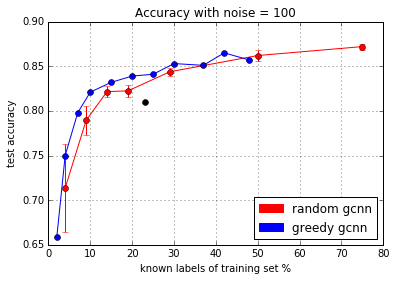

In [30]:

dict_plot = get_split_data(results)
dict_plot.update(get_split_data(results_random, prefix_keys="random_"))
plot_test('Accuracy with noise = 100','greedy_GCN_100.png',dict_plot)
